# Pre-processing & Training Data Development :

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
movie = pd.read_csv('/Users/Amin/Documents/GitHub/Movie_boxoffice_reviews/data/processed/pre_process_db.csv',index=False)

TypeError: read_csv() got an unexpected keyword argument 'index'

In [5]:
movie.columns

Index(['Unnamed: 0', 'All_time_gross', 'tom_cri_score', 'tom_aud_score',
       'met_cri_score', 'met_aud_score', 'imdb_score', 'imdb_us_score',
       'imdb_fem_score', 'class'],
      dtype='object')

In [10]:
movie_score = pd.DataFrame()
movie_score['All_time_gross'] = movie.All_time_gross
movie_score['tom_cri_score'] = ((movie.tom_cri_no-np.min(movie.tom_cri_no))/(np.max(movie.tom_cri_no)- np.min(movie.tom_cri_no))) * movie.tom_cri_vote
movie_score['tom_aud_score'] = ((movie.tom_aud_no-np.min(movie.tom_aud_no))/(np.max(movie.tom_aud_no)-np.min(movie.tom_aud_no))) * movie.tom_aud_vote
movie_score['met_cri_score'] = ((movie.met_cri_no-np.min(movie.met_cri_no))/(np.max(movie.met_cri_no)-np.min(movie.met_cri_no))) * movie.met_cri_vote
movie_score['met_aud_score'] = ((movie.met_aud_no-np.min(movie.met_aud_no))/(np.max(movie.met_aud_no)-np.min(movie.met_aud_no))) * movie.met_aud_vote
movie_score['imdb_score'] = ((movie.imdb_no-np.min(movie.imdb_no))/(np.max(movie.imdb_no)-np.min(movie.imdb_no))) * movie.imdb_vote
movie_score['imdb_us_score']=((movie.imdb_us_no-np.min(movie.imdb_us_no))/(np.max(movie.imdb_us_no)-np.min(movie.imdb_us_no))) * movie.imdb_us_vote
movie_score['imdb_nus_score']=((movie.imdb_nus_no-np.min(movie.imdb_nus_no))/(np.max(movie.imdb_nus_no)-np.min(movie.imdb_nus_no)))*movie.imdb_nus_vote
movie_score['imdb_fem_score']=((movie.imdb_fem_no-np.min(movie.imdb_fem_no))/(np.max(movie.imdb_fem_no)-np.min(movie.imdb_fem_no))) * movie.imdb_fem_vote
movie_score['imdb_mal_score'] = ((movie.imdb_mal_no-np.min(movie.imdb_mal_no))/(np.max(movie.imdb_mal_no)-np.min(movie.imdb_mal_no))) * movie.imdb_mal_vote
movie_score['class'] = movie['class']

In [11]:
movie_score.head()

,All_time_gross,tom_cri_score,tom_aud_score,met_cri_score,met_aud_score,imdb_score,imdb_us_score,imdb_nus_score,imdb_fem_score,imdb_mal_score,class
0,62832209,11.180385,0.248638,28.000000,0.536788,2.064492,1.947460,2.204462,3.230484,1.835178,Average
1,428028233,24.294221,0.290463,33.000000,1.651263,4.196134,4.240490,4.106055,3.140899,4.202086,Average
2,225973340,24.462347,0.620494,36.550000,4.073777,5.110510,4.514100,5.545154,4.154062,5.385422,Average
3,42213,1.821366,0.002707,4.783333,0.025261,0.051761,0.079159,0.052312,0.053576,0.051170,Indie
4,880166924,62.353765,3.963631,59.616667,17.351644,18.251734,17.747966,15.705143,13.584817,17.383293,Blockbuster


In [13]:
movie_score.describe().T

,count,mean,std,min,25%,50%,75%,max
All_time_gross,3276.0,7.193749e+07,1.885635e+08,177.0,223421.250000,3.471091e+06,4.905136e+07,2.797501e+09
tom_cri_score,3276.0,1.249701e+01,1.423395e+01,0.0,2.230298,7.021891e+00,1.815762e+01,8.664799e+01
tom_aud_score,3276.0,8.185137e-01,2.460268e+00,0.0,0.010045,8.998959e-02,6.448805e-01,7.600000e+01
met_cri_score,3276.0,2.129538e+01,1.727440e+01,0.0,7.066667,1.700000e+01,3.230000e+01,8.800000e+01
met_aud_score,3276.0,1.350672e+00,3.828720e+00,0.0,0.054531,2.278970e-01,9.817061e-01,6.473937e+01
imdb_score,3276.0,2.382261e+00,5.223244e+00,0.0,0.102347,4.957343e-01,2.258575e+00,8.800000e+01
imdb_us_score,3276.0,2.512044e+00,5.139497e+00,0.0,0.137849,5.819906e-01,2.478241e+00,8.700000e+01
imdb_nus_score,3276.0,2.590717e+00,5.314434e+00,0.0,0.118668,5.671652e-01,2.615265e+00,8.700000e+01
imdb_fem_score,3276.0,2.682522e+00,5.538160e+00,0.0,0.119661,5.900872e-01,2.615517e+00,8.600000e+01
imdb_mal_score,3276.0,2.419273e+00,5.286570e+00,0.0,0.102267,5.031768e-01,2.237605e+00,8.800000e+01


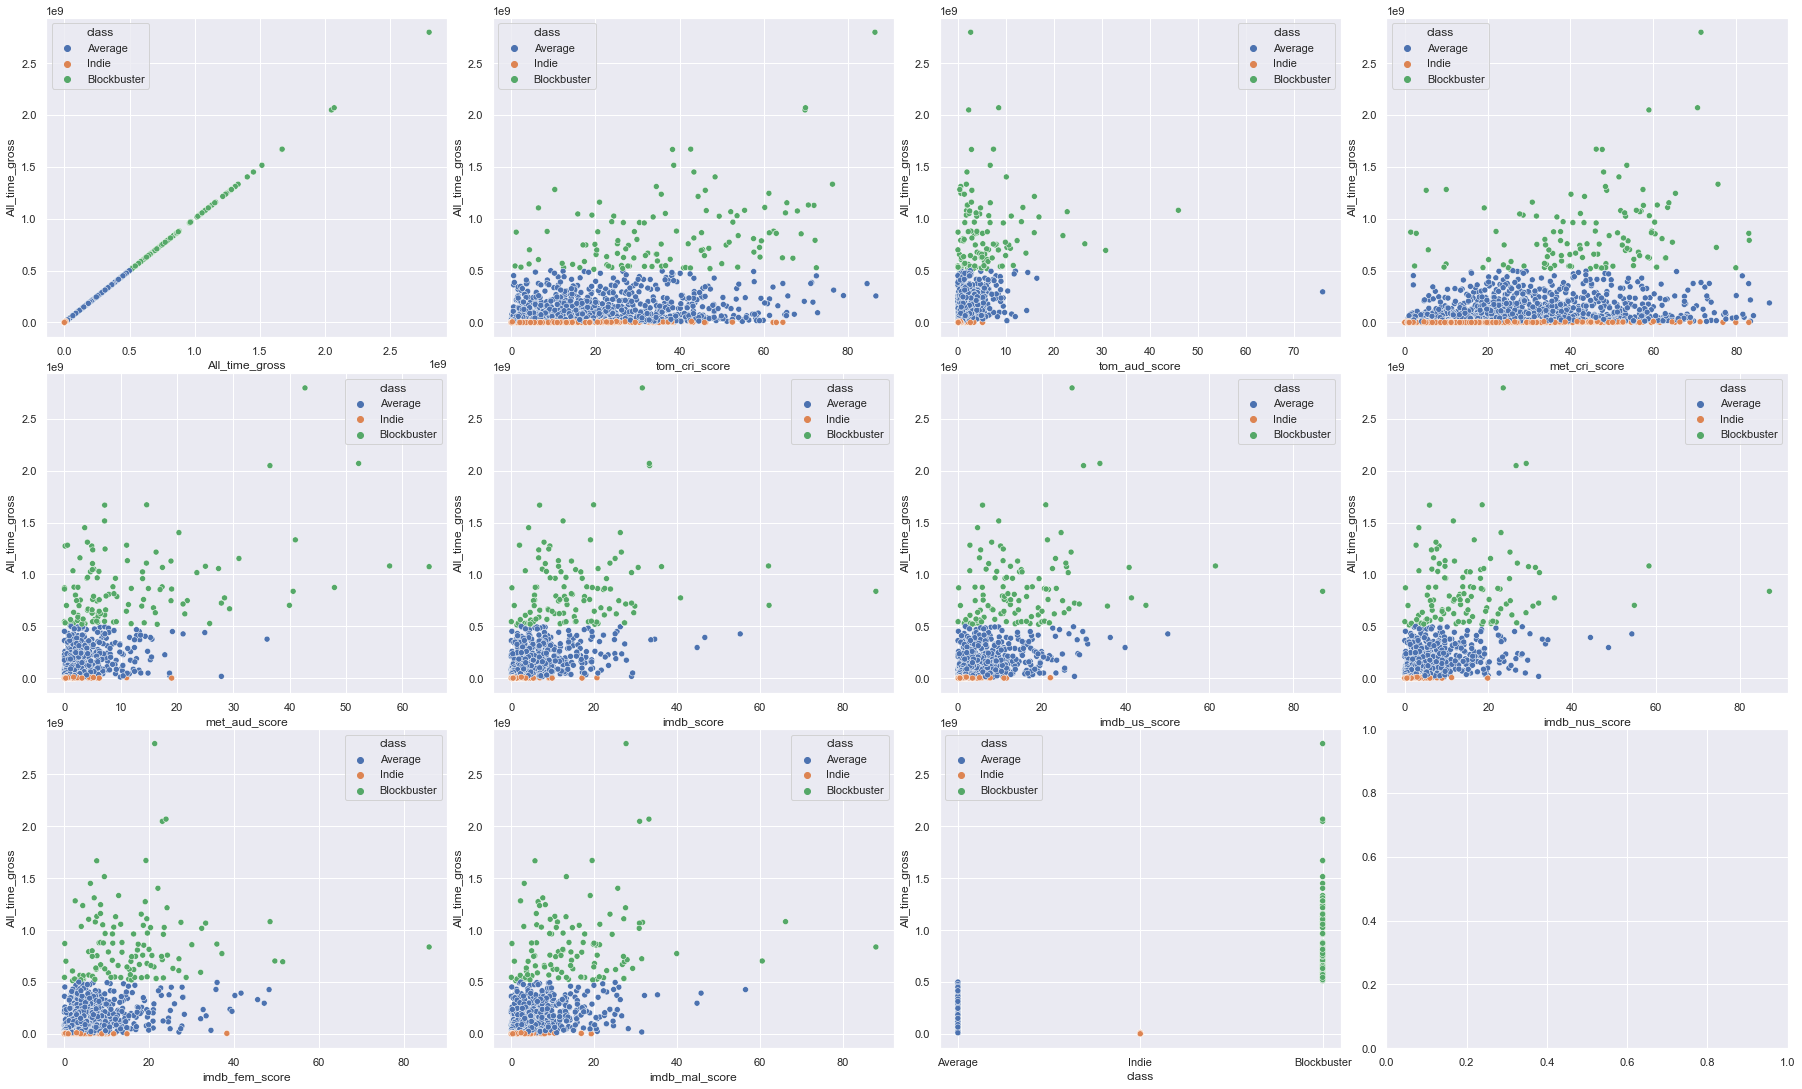

In [18]:
sns.set(rc={'figure.figsize':(10,8)})
col = movie_score.columns
col.drop('class')
fig, axes = plt.subplots(3,4, figsize=(25,15))
fig.tight_layout()
for i, ax in zip(col, axes.flat):
         _ = sns.scatterplot(ax=ax,x=i,y= 'All_time_gross',data=movie_score,hue='class')